# Introduction
> The below example showcases how you can utilise the FairML toolkit to extract feature dependence of your deployed model. In the below example we use a logistic regression model. You can however use any classifier or regressor

> Documentation for this ToolKit can be found here: https://github.com/adebayoj/fairml

# Import modules

## Modules for model building and data processing
> Secondly, we will import the required libraries/modules

In [11]:
import pandas as pd
import numpy as np
import shap
from sklearn.linear_model import LogisticRegression
import matplotlib
import tkinter
matplotlib.use('Agg')
%matplotlib inline
from matplotlib import pyplot as plt

## Import two key libraries from FairML
> Below we import the required libraries for FairML

In [12]:
from fairml import audit_model
from fairml import plot_dependencies

# Run example model for audit

## Read data 
> The first step of this example will be to load the relevant data. Ensure to have the 'dataset' folder in the same directory structure as the Python Notebook file which we are working on here

In [35]:
data = pd.read_csv('dataset/propublica_data_for_fairml.csv') # Change the directory shown here to the directory of the dataset you are looking to explore

## Create feature and design matrix for model building
> Below we will select which field we look to predict on (our target field)

> There-onward we drop this field from the dataset and use all the other fields that exist to predict our target field

In [31]:
compas_rating = data.score_factor.values
data = data.drop("score_factor",1)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


## Fit logistic regression sklearn model
> Below we fit a logistic regression sklearn model based on our remaining dataset

In [32]:
clf = LogisticRegression(penalty='l2', C=0.01)
clf.fit(data.values,compas_rating)

LogisticRegression(C=0.01)

# Audit the model with FairML

## Call audit model with model & print feature importance
> Below we audit our model using FairML, this will tell us the feature dependence for each field that is relevant to predicting our target field

> This tells us which fields may contain forms of bias that heavily influence our models decisions

In [33]:
total, _ = audit_model(clf.predict, data)
print(total)

Feature: Two_yr_Recidivism,	 Importance: 0.23817239144523655
Feature: Number_of_Priors,	 Importance: 0.34996759559300067
Feature: Age_Above_FourtyFive,	 Importance: -0.012313674659753726
Feature: Age_Below_TwentyFive,	 Importance: 0.13399222294232016
Feature: African_American,	 Importance: 0.23136746597537264
Feature: Asian,	 Importance: -0.0003240440699935191
Feature: Hispanic,	 Importance: -0.008911211924821775
Feature: Native_American,	 Importance: 0.0004860661049902787
Feature: Other,	 Importance: -0.004374594944912508
Feature: Female,	 Importance: 0.04455605962410888
Feature: Misdemeanor,	 Importance: -0.057031756318859365


## Generate feature dependence plot
> Below we show some examples of how we can display the feature dependence data that we have retrieved using FairML

### Bar Plot

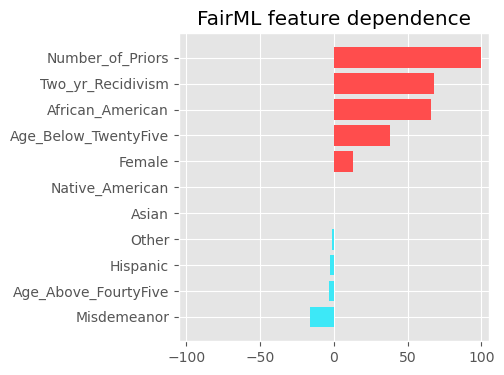

In [13]:
fig = plot_dependencies(
    total.median(),
    reverse_values = False,
    title = "FairML feature dependence"
)
# plt.savefig("fairml_ldp.eps", transparent=False, bbox_inches='tight') # Uncomment this line if you wish to save your plot